## Importing Basic Libraries

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading the csv file

In [105]:
data=pd.read_csv("MHR.csv")

In [106]:
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


### Age : Age in years
### SystolicBP : Systolic Blood Pressure
### DiastolicBP : Diastolic Blood Pressure
### BS : Blood Sugar
### BodyTemp : Body Temperature in Fahrenheit
### HeartRate : Heart rate in BPM
### RiskLevel : Maternal Health Risk ( 1: Low, 2: Medium, 3: High )

Here in this dataset RiskLevel is the target variable( dependent variable) which we have to predict by using ML and all the other variables are the independent variables on which the target depends and these variables will be used in predicting the target variable.

In [107]:
data.tail()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk
1013,32,120,65,6.0,101.0,76,mid risk


## Exploratory Data analysis

In [108]:
data.shape

(1014, 7)

In [109]:
data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


Statstical Details Describe provides us with statistical information in the numerical format. The quartiles details are given in form of 25%, 50% and 75%. The data is divided into 3 quartiles or 4 equal parts. so 25% values lie in each group. standard deviation and mean are statistical measures which give us an idea of the central tendency of the data set. However , mean is effected by outliers and hence we need more information to make accurate decisions.

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
Age            1014 non-null int64
SystolicBP     1014 non-null int64
DiastolicBP    1014 non-null int64
BS             1014 non-null float64
BodyTemp       1014 non-null float64
HeartRate      1014 non-null int64
RiskLevel      1014 non-null object
dtypes: float64(2), int64(4), object(1)
memory usage: 55.5+ KB


In [111]:
data['RiskLevel'].replace({'high risk':3, 'mid risk' :2, 'low risk': 1},inplace=True)

Changing the datatype of target variable(RiskLevel) from 'object' to 'int64'

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
Age            1014 non-null int64
SystolicBP     1014 non-null int64
DiastolicBP    1014 non-null int64
BS             1014 non-null float64
BodyTemp       1014 non-null float64
HeartRate      1014 non-null int64
RiskLevel      1014 non-null int64
dtypes: float64(2), int64(5)
memory usage: 55.5 KB


Checking the number of null values in the data set :-

In [113]:
data.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

we notice that the dataset has no null values.
this saved us from conveting the null values into some data or dropping then altogether.

## Finding the correlation among the attributes

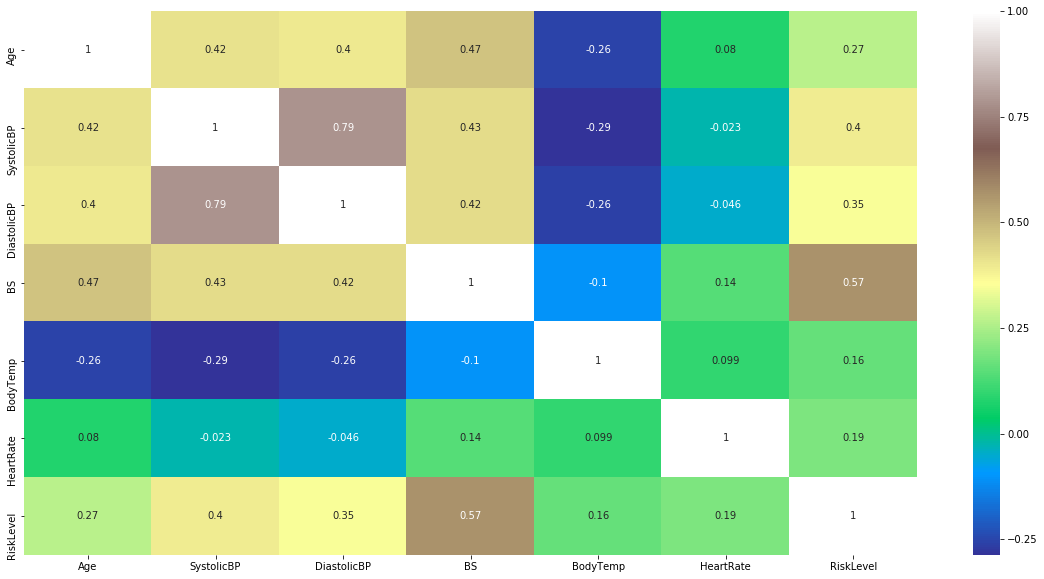

In [114]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap='terrain')

We can see that there is a positive correlation between the target variable and all other independent variables

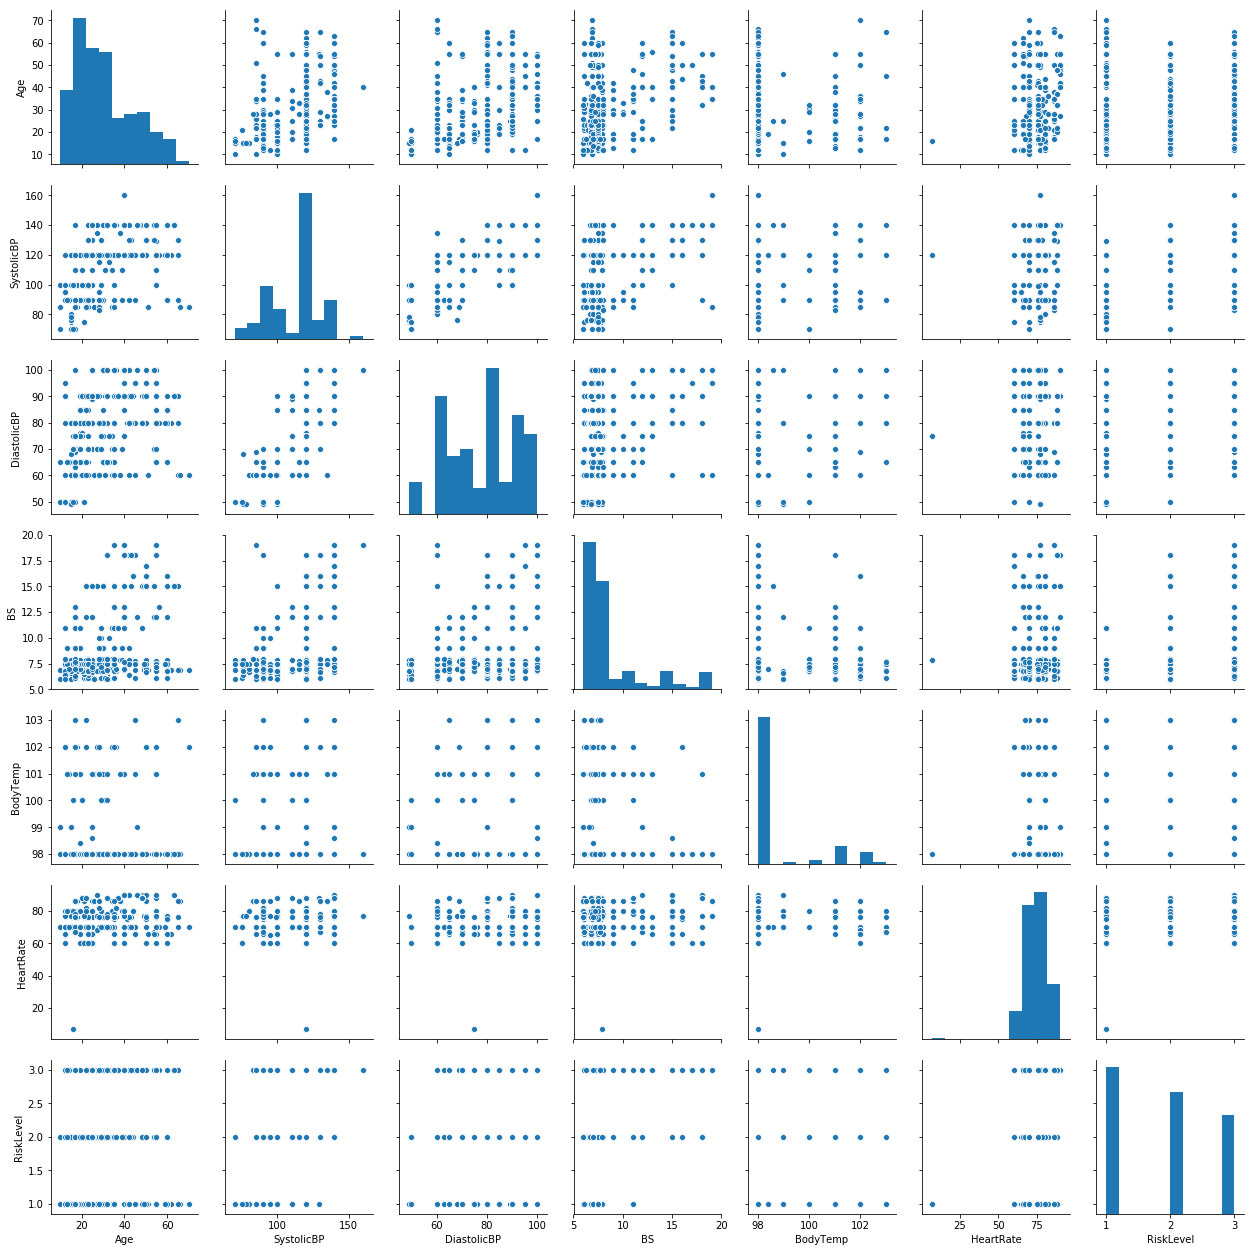

In [115]:
sns.pairplot(data=data)

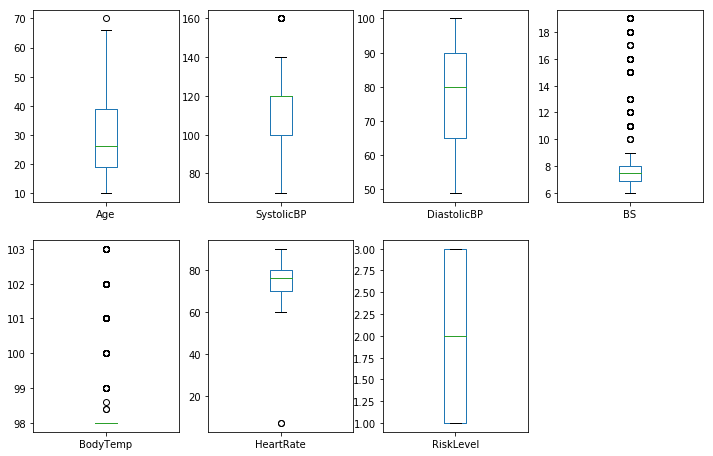

In [116]:
# box and whiskers plot
data.plot(kind='box', subplots=True, layout=(3,4), figsize=(12,12))
plt.show()

# Preparing the data for Model 

### Scaling the data

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()  
IC=['Age','SystolicBP','DiastolicBP','BS','BodyTemp','HeartRate']
data[IC]= StandardScaler.fit_transform(data[IC])

In [118]:
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,-0.361738,0.913396,0.255023,1.905890,-0.485215,1.446956,3
1,0.380777,1.457027,0.975539,1.298340,-0.485215,-0.532088,3
2,-0.064732,-1.261127,-0.465493,-0.220537,0.973884,0.704815,3
3,0.009519,1.457027,0.615281,-0.524312,-0.485215,-0.532088,3
4,0.380777,0.369765,-1.186009,-0.797710,-0.485215,0.210054,1


In [119]:
X= data.drop(['RiskLevel'], axis=1)
Y= data['RiskLevel']

In [120]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.30, random_state=50)

### Check the sample Size

In [121]:
print('X_train-', x_train.size)
print('X_test-',x_test.size)
print('y_train-', y_train.size)
print('y_test-', y_test.size)

X_train- 4254
X_test- 1830
y_train- 709
y_test- 305


### Logistic Regression

In [122]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

model1=lr.fit(x_train,y_train)
prediction1=model1.predict(x_test)

In [123]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm=confusion_matrix(y_test,prediction1)

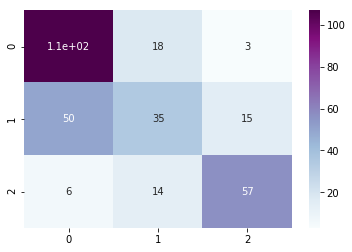

In [124]:
sns.heatmap(cm, annot=True,cmap='BuPu')

In [125]:
accuracy_score(y_train, train_pred)

0.5881523272214386

In [126]:
print(classification_report(y_test, prediction1))

             precision    recall  f1-score   support

          1       0.66      0.84      0.74       128
          2       0.52      0.35      0.42       100
          3       0.76      0.74      0.75        77

avg / total       0.64      0.65      0.64       305



## Decision Tree Classifier

In [127]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
model2=dtc.fit(x_train,y_train)
prediction2=model2.predict(x_test)


In [128]:
cm2=confusion_matrix(y_test,prediction2)
cm2

array([[98, 25,  5],
       [10, 83,  7],
       [ 2,  7, 68]], dtype=int64)

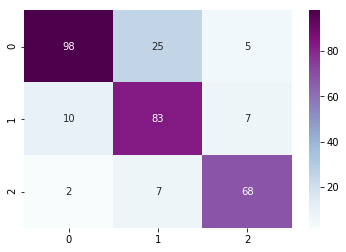

In [129]:
sns.heatmap(cm2, annot=True,cmap='BuPu')

In [130]:
accuracy_score(y_test,prediction2)

0.8163934426229508

In [131]:
print(classification_report(y_test, prediction2))

             precision    recall  f1-score   support

          1       0.89      0.77      0.82       128
          2       0.72      0.83      0.77       100
          3       0.85      0.88      0.87        77

avg / total       0.83      0.82      0.82       305



## Random Forest Classifier

In [132]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
model3 = rfc.fit(x_train, y_train)
prediction3 = model3.predict(x_test)


In [133]:
cm3=confusion_matrix(y_test, prediction3)
cm3

array([[104,  21,   3],
       [ 11,  81,   8],
       [  3,   2,  72]], dtype=int64)

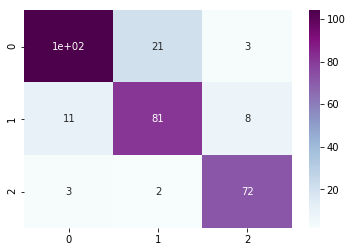

In [134]:
sns.heatmap(cm3, annot=True,cmap='BuPu')

In [135]:
accuracy_score(y_test, prediction3)

0.8426229508196721

In [136]:
print(classification_report(y_test, prediction3))

             precision    recall  f1-score   support

          1       0.88      0.81      0.85       128
          2       0.78      0.81      0.79       100
          3       0.87      0.94      0.90        77

avg / total       0.84      0.84      0.84       305



## Support Vector Classification

In [137]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [138]:
from sklearn.svm import SVC

svm=SVC()
model4=svm.fit(x_train,y_train)
prediction4=model4.predict(x_test)
cm4= confusion_matrix(y_test,prediction4)

In [139]:
cm4

array([[110,  15,   3],
       [ 49,  40,  11],
       [  4,  16,  57]], dtype=int64)

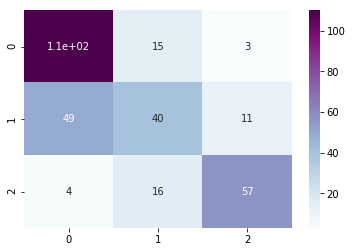

In [140]:
sns.heatmap(cm4, annot=True,cmap='BuPu')

In [141]:
accuracy_score(y_test, prediction4)

0.6786885245901639

In [142]:
print(classification_report(y_test, prediction4))

             precision    recall  f1-score   support

          1       0.67      0.86      0.76       128
          2       0.56      0.40      0.47       100
          3       0.80      0.74      0.77        77

avg / total       0.67      0.68      0.67       305



## Gaussian Naive Bayes

In [143]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
model5 = NB.fit(x_train, y_train)
prediction5 = model5.predict(x_test)
cm5= confusion_matrix(y_test, prediction5)

In [144]:
cm5

array([[117,   8,   3],
       [ 69,  20,  11],
       [ 10,  18,  49]], dtype=int64)

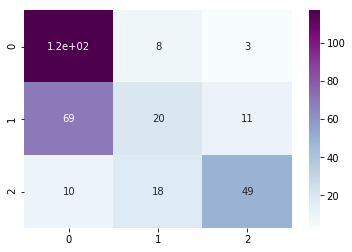

In [145]:
sns.heatmap(cm5, annot=True,cmap='BuPu')

In [146]:
accuracy_score(y_test, prediction5)

0.6098360655737705

In [147]:
print(classification_report(y_test, prediction5))

             precision    recall  f1-score   support

          1       0.60      0.91      0.72       128
          2       0.43      0.20      0.27       100
          3       0.78      0.64      0.70        77

avg / total       0.59      0.61      0.57       305



## K Nearest Neighbor Classifier

In [148]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
model6 = KNN.fit(x_train, y_train)
prediction6 = model6.predict(x_test)
cm6= confusion_matrix(y_test, prediction5)
cm6

array([[117,   8,   3],
       [ 69,  20,  11],
       [ 10,  18,  49]], dtype=int64)

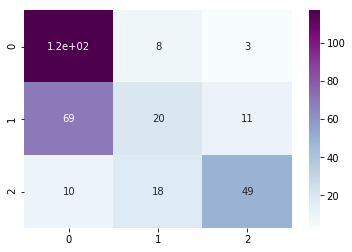

In [149]:
sns.heatmap(cm6, annot=True,cmap='BuPu')

In [150]:
accuracy_score(y_test, prediction6)

0.6918032786885245

In [151]:
print(classification_report(y_test, prediction6))

             precision    recall  f1-score   support

          1       0.71      0.80      0.75       128
          2       0.58      0.56      0.57       100
          3       0.83      0.68      0.74        77

avg / total       0.70      0.69      0.69       305



## Accuracy summary of all models

In [152]:
print('lr Logistic Regression :', accuracy_score(y_test, prediction1))
print('dtc Decision Tree Classifier :', accuracy_score(y_test, prediction2))
print('rfc Random Forest Classifier :', accuracy_score(y_test, prediction3))
print('NB: GaussianNB :', accuracy_score(y_test, prediction4))
print('SVC Support Vector Classifier :', accuracy_score(y_test, prediction5))
print('KNN K Nearest Neighbors :', accuracy_score(y_test, prediction6))

lr Logistic Regression : 0.6524590163934426
dtc Decision Tree Classifier : 0.8163934426229508
rfc Random Forest Classifier : 0.8426229508196721
NB: GaussianNB : 0.6786885245901639
SVC Support Vector Classifier : 0.6098360655737705
KNN K Nearest Neighbors : 0.6918032786885245


### So we got the best accuracy from Random Forest classifier : 84.2%
### followed by Decision tree classifier : 81.6%